# Neural Networks in Tensorflow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import constant

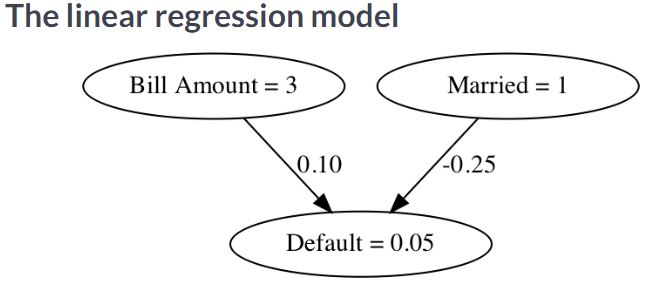

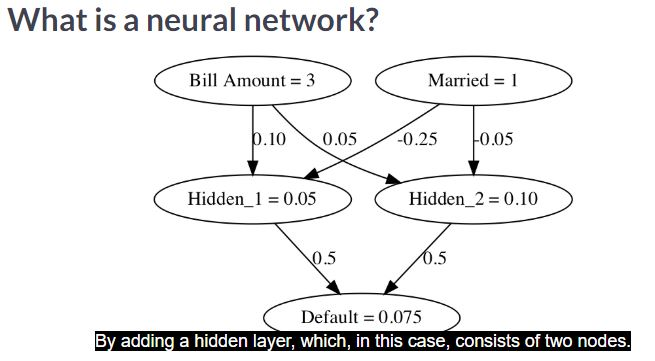

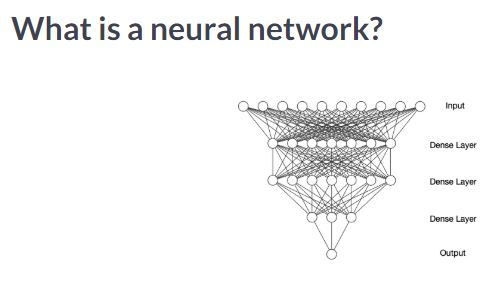

In [6]:
# Define inputs (features)
inputs = tf.constant([[1, 35]], tf.float32) # mairital status is 1 and age is 35 input layer

In [7]:
# Define weights which we will train to predict outputs from inputs
weights = tf.Variable([[-0.05], [-0.01]])

In [8]:
# define bias which plays similar role as intercept in linear regression model
bias = tf.Variable([0.5])

# Define a simple dense layer using low level apprach or matrix multiplication in linear algebra

In [9]:
# Multiply inputs (features) by the weights
# This is the low level approach using linear algebra
product = tf.matmul(inputs, weights)

In [11]:
# define dense layer
dense = tf.keras.activations.sigmoid(product+bias)

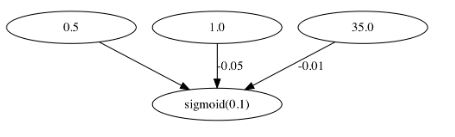

# High level approach of matrix multiplication

In [12]:
# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation = 'sigmoid')(inputs)

In [13]:
# Define second dense layer
dense2 = tf.keras.layers.Dense(5, activation = 'sigmoid') (inputs)

# The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.
The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

In [15]:
borrower_features = np.array([[ 2.,  2., 43.]], dtype=np.float32)

In [21]:
# Initialize bias1
bias1 = tf.Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = tf.Variable(tf.ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = tf.matmul(borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (1, 2)


In [ ]:
# From previous step
bias1 = tf.Variable(1.0)
weights1 = tf.Variable(tf.ones((3, 2)))
product1 = tf.matmul(borrower_features, weights1)
dense1 = tf.keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = tf.Variable(1.0)
weights2 = tf.Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 =tf. matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = tf.keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')

# The low-level approach with multiple examples
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

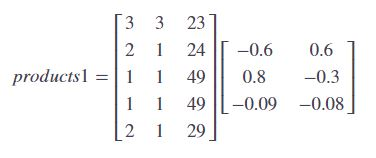

In [23]:
borrower_features = np.array([[ 3.,  3., 23.],
       [ 2.,  1., 24.],
       [ 1.,  1., 49.],
       [ 1.,  1., 49.],
       [ 2.,  1., 29.]], dtype= np.float32)

weights1 = np.array([[-0.6 ,  0.6 ],
       [ 0.8 , -0.3 ],
       [-0.09, -0.08]], dtype=np.float32)

weights2 = np.array([[1.07],
       [1.04]], dtype=np.float32)

bias1 =np.array([[1.07],
       [1.04]], dtype= np.float32)

In [26]:
# Compute the product of borrower_features and weights1
products1 = np.matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = tf.keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (5, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  ()

 shape of dense1:  (5, 2)


# Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.
To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function. Note that input data has been defined and is available as a 100x10 tensor: borrower_features. Additionally, the keras.layers module is available.

In [27]:
# Define the first dense layer
dense1 = tf.keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = tf.keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (5, 7)

 shape of dense2:  (5, 3)

 shape of predictions:  (5, 1)


# Activation functions

In [28]:
# Define example borrower features
young, old = 0.3, 0.6
low_bill, high_bill = 0.1, 0.5

In [29]:
# apply matrix multiplication step for all feature combinations
young_high = 1.0*young + 2.0*high_bill
young_low = 1.0*young + 2.0*low_bill
old_high = 1.0*old + 2.0*high_bill
old_low = 1.0*old + 2.0*low_bill

# Binary classification problems
In this exercise, you will again make use of credit card data. The target variable, default, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, outputs, and compare those the target variable, default.

The tensor of features has been loaded and is available as bill_amounts. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

In [30]:
# Import pandas under the alias pd
import pandas as pd

# Assign the path to a string variable named data_path
data_path = 'uci_credit_card.csv'

# Load the dataset as a dataframe named housing
credit = pd.read_csv(data_path)

# Print the price column of housing
print(credit)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [31]:
list(credit.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [39]:
# make the 3 bill columns the input
credit2 = credit[['BILL_AMT1','BILL_AMT2','BILL_AMT3']]
bill_amounts = np.array(credit2, np.float32) # make inupts numpy array

# make the target or label or dependent column into numpy
credit3 = credit[['default.payment.next.month']]
default = np.array(credit3, np.float32) # make inupts numpy array

print(bill_amounts)
print(default)

[[ 3913.  3102.   689.]
 [ 2682.  1725.  2682.]
 [29239. 14027. 13559.]
 ...
 [ 3565.  3356.  2758.]
 [-1645. 78379. 76304.]
 [47929. 48905. 49764.]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [40]:
# Construct input layer from features
inputs = constant(bill_amounts, np.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]]


# Multiclass classification problems
In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. The tensor of features has been loaded and is available as borrower_features. Additionally, the constant(), float32, and keras.layers.Dense() operations are available. <br>

Define the input layer as a 32-bit constant tensor using borrower_features. <br>
Set the first dense layer to have 10 output nodes and a sigmoid activation function. <br>
Set the second dense layer to have 8 output nodes and a rectified linear unit activation function. <br>
Set the output layer to have 6 output nodes and the appropriate activation function.


In [41]:
# make the 3 bill columns the input
creditz = credit[['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',]]
borrower_features = np.array(creditz, np.float32) # make inupts numpy array


In [42]:
# Construct input layer from borrower features
inputs = constant(borrower_features, np.float32)

# Define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = tf.keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = tf.keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.2930527  0.06619792 0.25754884 0.0494922  0.11811405 0.21559423]
 [0.28916407 0.04697733 0.26122555 0.05498712 0.1305771  0.21706882]
 [0.3441803  0.04752224 0.2318658  0.05953556 0.11239322 0.20450293]
 [0.3441803  0.04752224 0.2318658  0.05953556 0.11239322 0.20450293]
 [0.3096189  0.08027539 0.21166904 0.07649836 0.14004846 0.18188983]]


Notice that each row of outputs sums to one. This is because a row contains the predicted class probabilities for one example. As with the previous exercise, our predictions are not yet informative, since we are using an untrained model with randomly initialized parameters. This is why the model tends to assign similar probabilities to each class.

# Optimizers

The dangers of local minima <br>
Consider the plot of the following loss function, loss_function(), which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.<br>

Set opt to use the stochastic gradient descent optimizer (SGD) with a learning rate of 0.01.<br>
Perform minimization using the loss function, loss_function(), and the variable with an initial value of 6.0, x_1.<br>
Perform minimization using the loss function, loss_function(), and the variable with an initial value of 0.3, x_2.<br>
Print x_1 and x_2 as numpy arrays and check whether the values differ. These are the minima that the algorithm identified.

In [52]:
# define the model function
def model(bias, weights, features = borrower_features):
    product = tf.matmul(features,weights)
    return tf.keras.activations.sigmoid(product+bias)

# Define a loss function
def loss_function(scalar, features = borrower_features, targets = default):
    # Compute the predicted values
    predictions = model(scalar, features)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)


In [ ]:
# Initialize x_1 and x_2
x_1 = tf.Variable(6.0,np.float32)
x_2 = tf.Variable(0.3,np.float32)

# Define the optimization operation
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

4.3801394 0.42052683

# Avoiding local minima
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as loss_function().

In [ ]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,float32)
x_2 = Variable(0.05,float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

# Initialization in TensorFlow
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23. Several operations have been imported from tensorflow: Variable(), random(), and ones().

In [56]:
# Define the layer 1 weights
w1 = tf.Variable(np.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]))

# Define the layer 2 weights
w2 = tf.Variable(np.random.normal([7, 1]))

# Define the layer 2 bias
b2 = tf.Variable(0.0)

# Defining the model and loss function
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as borrower_features and default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as σ(layer1∗w2+b2), where σ is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [57]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    # Apply dropout
	dropout = tf.keras.layers.Dropout(0.25)(layer1)
	return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return tf.keras.losses.binary_crossentropy(targets, predictions)

# Training neural networks with TensorFlow
In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise. You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you. The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [ ]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

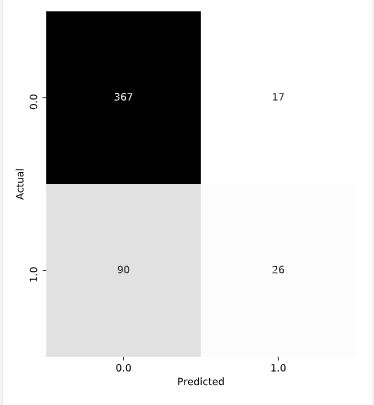